# SPOT THE MASK
_KTM, 19 Aug 2020_

In [94]:
# fastai imports
from fastai.vision import *

# custom imports
import os
import datetime

## 0. GPU?

In [3]:
torch.cuda.is_available()

True

## 1. Data

In [4]:
path = Path('./data')

In [5]:
tfms = get_transforms()

In [6]:
data = ImageDataBunch.from_csv(path,
    folder='train',
    test='test',
    csv_labels='train_labels.csv',
    valid_pct=0.2,
    fn_col='image',
    label_col='target',
    header='infer',
    no_check=False,
    ds_tfms=tfms,
    size=128)

In [7]:
ds = data.train_ds

## 2. Explore Images and Labels

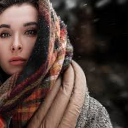

In [14]:
img, label = ds[1000]
img

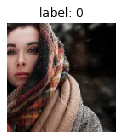

In [15]:
img.show(figsize=(2,2), title='label: ' + str(label))

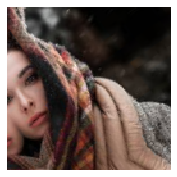

In [16]:
img.rotate(35).show()

## Load the Learner

In [17]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

## Learning Finder: `lr_find`

In [19]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


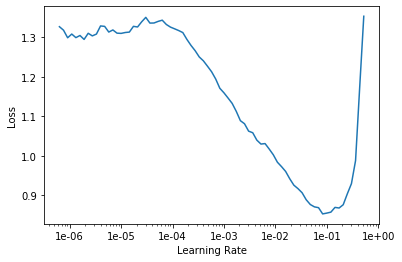

In [20]:
learn.recorder.plot()

## Train

In [18]:
learn.fit(5, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.767570,1.014623,0.770115,00:48
1,0.504840,0.882511,0.839080,00:57
2,0.430427,0.477277,0.877395,00:53
3,0.351436,0.321114,0.904215,00:54
4,0.298920,0.393726,0.888889,00:55


In [24]:
learn.save('stm_model_v01')

## Predict

In [25]:
test_ds = data.test_ds

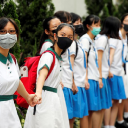

In [61]:
test_img, test_label = test_ds[9]
test_img

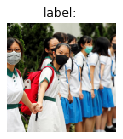

In [42]:
test_img.show(figsize=(2,2), title='label: ' + str(label))

In [43]:
learn.predict(test_img)

(Category 1, tensor(1), tensor([0.0087, 0.9913]))

In [55]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)
test_labels = np.argmax(preds, 1)

In [62]:
test_labels[9]

tensor(1)

In [68]:
Image.open('./data/test/' + os.listdir('./data/test')[9])

AttributeError: type object 'Image' has no attribute 'open'

In [83]:
submission = pd.DataFrame(
data=[pd.Series(data=os.listdir('./data/test'), name='image'),
     pd.Series(data=test_labels, dtype=np.int32, name='target')]).T
submission.head()

,image,target
0,aadawlxbmapqrblgxyzarhjasgiobu.png,1
1,abpxvdfyhaaohzcrngcucmhffwizxs.jpg,0
2,aclkjfvackiieiznzfcwienplielrj.jpg,1
3,aelkivmayxgsdjosiibfgmkvfrjvjk.jpg,1
4,aelzzshpfxerelefnkatpczktuxjln.jpg,0


In [106]:
time_str = '_'.join([str(datetime.datetime.now().hour), str(datetime.datetime.now().minute)])
submission.to_csv(f'submission_{time_str}.csv', index=False)

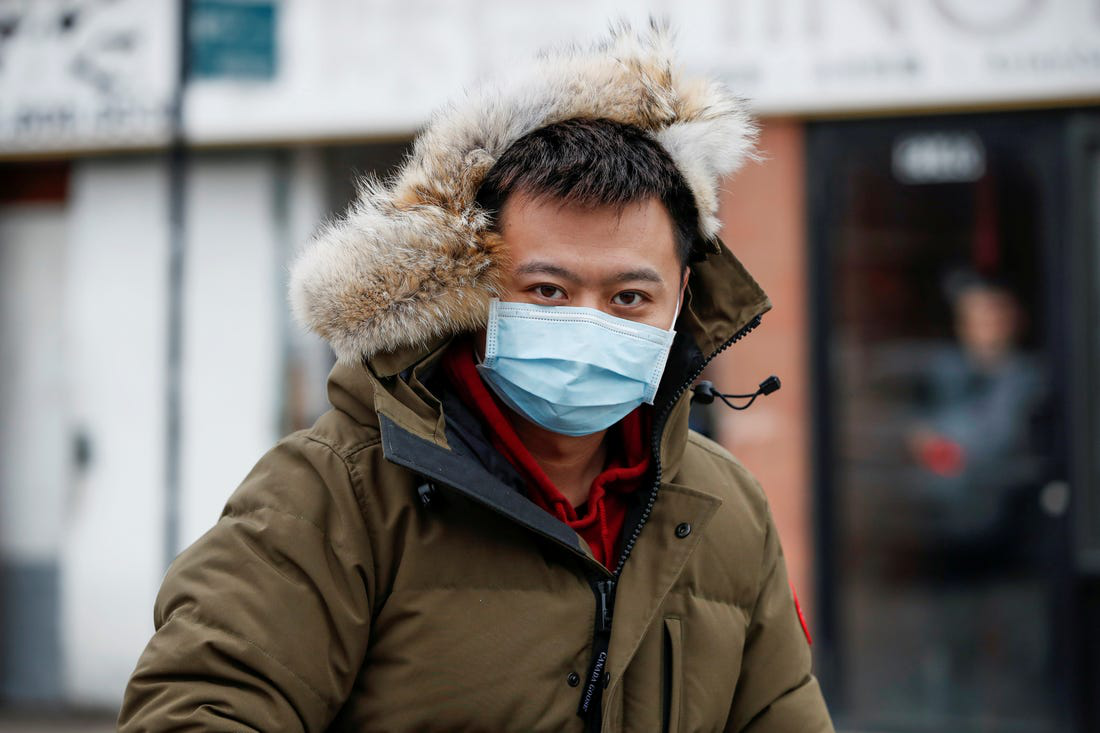

In [87]:
open_image(str(path) + '/test/' + 'dhxbbarhojjiuoacxyzdtayykriavi.jpg' )